# Effectiveness of feedforward neural network for classifying images

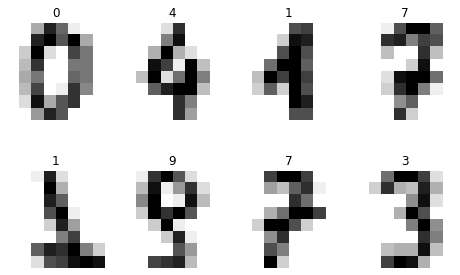

In [77]:
from sklearn.datasets import load_digits
import pandas as pd
# import sys
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)


digits = load_digits()
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']
# print("data images target target_names: {} {} {} {}".format(len(data), len(images), len(target), len(target_names)))

fig = plt.figure(figsize=(8,5))
first_row = [0,100,200,300]
sec_row = [1000, 1100, 1200, 1300]
n_plots = 8
i=0
for val in first_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
    
for val in sec_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
# plt.imshow(images[0],cmap='binary')

##### Convert the image pixel data 'data' into a DataFrame and convert the 'target' numpy array containing the value of a digit at the corresponding index in 'data' into Series

In [78]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier 

# Convert the above arrays into DataFrames and Series
source_df = pd.DataFrame(data)
target_s = pd.Series(target)

# Shuffle the data
np.random.seed(1)
shuffled_index = np.random.permutation(source_df.index)
source_df = source_df.loc[shuffled_index]
target_s = target_s.loc[shuffled_index]


##### Linear and logistic regression assume linearity between input features and the output. Since k-nearest neighbor makes no such assumption, we can use to capture non-linearity of data. k-nearest neighbor compares every training observation with the test feature and chooses the closest match. So, let's use the KNeighborClassifer

# Train and Test using K-Fold Validation

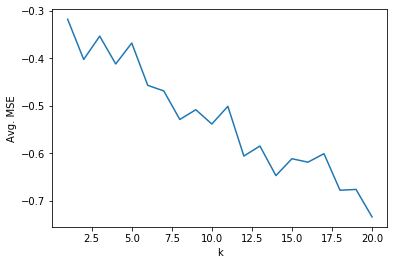

[-0.31828507795100225, -0.40286067804998765, -0.3538393961890621, -0.41231625835189306, -0.3683296213808463, -0.457279138827023, -0.4689717891610987, -0.5290262311309082, -0.508469438257857, -0.5385473892600842, -0.501321455085375, -0.6058636476119773, -0.5847611977233358, -0.6469784706755753, -0.6114983914872556, -0.6187564959168522, -0.6009193268992824, -0.6777010640930463, -0.6760418213313537, -0.7338282603316011]


In [79]:
## Performing 4-fold cross validation
kf = KFold(4, shuffle=True, random_state=1)

# We would like to find an optimal value of k so that we can get the 
# least error.
k_values = 20
knn_avg_mses = []

for k in range(1,k_values+1):
    knn = KNeighborsClassifier(k)
    mses = cross_val_score(knn, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    knn_avg_mses.append(avg_mse)
    
# plot a line graph
plt.plot(range(1,k_values+1), knn_avg_mses)
plt.xlabel('k')
plt.ylabel('Avg. MSE')
plt.show()
print(knn_avg_mses)

##### We performed  hyperparameterization to find an least MSE( Mean Square Error). The optimal value at which MSE is minumum is at k=3. We observe that after k=7, the average MSE values are increasing.

##### Due to limitations of the K-Nearest Neighbor, such as high memory usage and no model representation to debug and explore we would use MLPClassifier. We will try different numbef of neurons in a single hidden layer. We will use the same model evaulation technique 'accuracy_score' to determine if we can bring down our error.

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

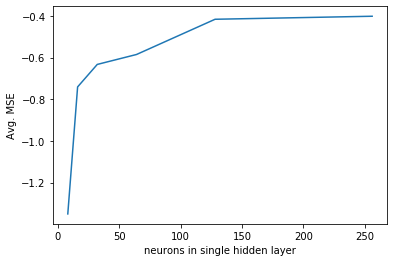

[-1.350756000989854, -0.7406434050977481, -0.6326540460282108, -0.5848874041078941, -0.4156953724325662, -0.40117792625587734]


In [80]:
from sklearn.neural_network import MLPClassifier

hidden_layer_neurons = (8,16,32,64,128,256)
mlp_avg_mses = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses.append(avg_mse)
    
# plot a line graph
plt.plot(hidden_layer_neurons, mlp_avg_mses)
plt.xlabel('neurons in single hidden layer')
plt.ylabel('Avg. MSE')
plt.show()
print(mlp_avg_mses)

##### At around 128 neurons in a single hidden layer is where we get optimal performance of model. Comparing this average MSE with MSE calculated using KFold validation, we still need to improve our model. So, let's try adding two hidden layers and adding neurons per hidden layer to see if it makes any difference

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

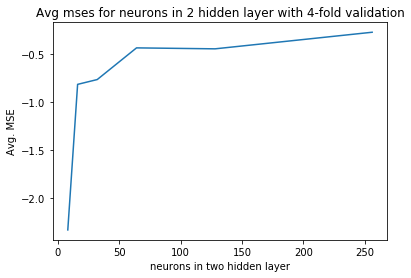

[-2.3320786933927247, -0.8189656025736204, -0.7688332096015837, -0.4396275674338035, -0.44958302400395944, -0.2771133382826033]


In [81]:
mlp_avg_mses_2_hidden_layer = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses_2_hidden_layer.append(avg_mse)
    
# plot a line graph
plt.plot(hidden_layer_neurons, mlp_avg_mses_2_hidden_layer)
plt.xlabel('neurons in two hidden layer')
plt.ylabel('Avg. MSE')
plt.title('Avg mses for neurons in 2 hidden layer with 4-fold validation')
plt.show()
print(mlp_avg_mses_2_hidden_layer)

##### Adding more hidden layers with Kfold=4 resulted in even worst performance than the our previous MLP model. Using more hidden layers tend to overfitting. So, let's make Kfold=6 and have 3 hidden layers.

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

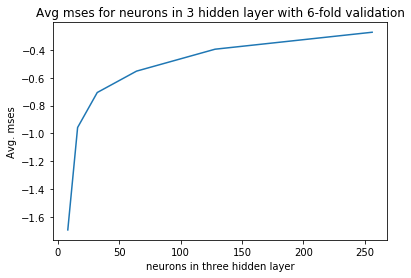

[-1.6918287552585993, -0.9571170502350903, -0.7061804008908685, -0.552848304875031, -0.39554813165058156, -0.2738839396189062]


In [82]:
neurons_per_layer = [10,64,128,256]

## Performing 6-fold cross validation
# kf = KFold(6, shuffle=True, random_state=1)

mlp_avg_mses_3_hidden_layer = []
for n in hidden_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mses = cross_val_score(mlp, source_df, target_s,scoring='neg_mean_squared_error',cv=kf)
    avg_mse = np.mean(mses)
    mlp_avg_mses_3_hidden_layer.append(avg_mse)
    
plt.plot(hidden_layer_neurons, mlp_avg_mses_3_hidden_layer)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 3 hidden layer with 6-fold validation')
plt.show()
print(mlp_avg_mses_3_hidden_layer)

Using 6 fold validation with 3 hidden layer gives more accuracy compared to 4-fold validation with 2 hidden layer, it still does not come close to using our K nearest algorithm.